# Mod 4 - Natural Language Processing Project

Please fill out:
* Student name: Max Steele
* Student pace: Full Time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL: <a href=""></a>

<font size=3rem>
    
- **[Introduction](#Introduction)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[INTERPRET](#INTERPRET)**<br>
- **[Conclusions/Recommendations](#Conclusions/Recommendations)<br>**
</font>

# Introduction

# OBTAIN

In [230]:
import numpy as np
np.random.seed(319)

In [231]:
from project_functions import *

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from tzlocal import get_localzone

In [233]:
## Import and preview dataset
full_df = pd.read_csv('Data/orig_labeled_data.csv', index_col=0)
full_df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [234]:
## View info for records and columns
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24783 entries, 0 to 25296
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   count               24783 non-null  int64 
 1   hate_speech         24783 non-null  int64 
 2   offensive_language  24783 non-null  int64 
 3   neither             24783 non-null  int64 
 4   class               24783 non-null  int64 
 5   tweet               24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.3+ MB


In [235]:
## Drop unnecessary columns
full_df = full_df.drop(columns=['count', 'hate_speech', 'offensive_language', 'neither'], axis=1)
full_df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [236]:
## Create column that translates number codes into class names to make things easier to keep track of
# Create a dict of values to be mapped
class_dict = {0: 'hate speech', 1: 'offensive', 2: 'neither'}

# Replace keys (0, 1, and 2) with corresponding values and preview dataset
full_df['class_code'] = full_df['class']
full_df['class'] = full_df['class_code'].map(class_dict)
full_df.head()

,class,tweet,class_code
0,neither,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [237]:
## Print value counts and percentages of classes for full dataset
check_unique(full_df, 'class') 
# Note: pretty extreme imbalance of classes

,count,%
offensive,19190,0.774321
neither,4163,0.167978
hate speech,1430,0.057701


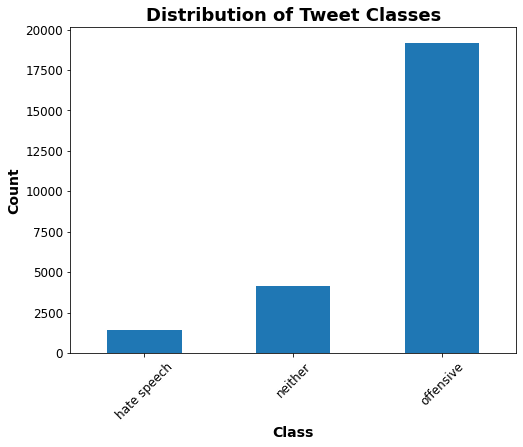

In [238]:
plt.figure(figsize=(8,6))
full_df.groupby('class').tweet.count().plot.bar(ylim=0)
plt.xlabel('Class', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of Tweet Classes', fontsize=18, fontweight='bold')
plt.show()

In [239]:
## Print value counts and percentages of tweets for full dataset
check_unique(full_df, 'tweet') # Each tweet only shows up once

,count,%
Got a iPhone for business but the sidekick is for the bitches &#127926;,1,0.00004
RT @xojeaninee: &#128553; dawg! &#8220;@Tressilicious: Pet peeve is finding out a cute guy has hoes. I automatically lose interest. I don't compete.&#8221;,1,0.00004
"""@Strap__: I ain't sharing no bitch if you mines you mines &#128175;""",1,0.00004
He gets this bratty attitude from Brittany .... and its for the birds.,1,0.00004
RT @sheemteam97: Fuck the Islamic State!! We will kill those cunts&#127468;&#127463;,1,0.00004
...,...,...
RT @LuchieCapone: &#8220;Kik me&#8221; ass hoes RT @mayasvritaa: Got an iPhone but it&#8217;s off ass bitches,1,0.00004
You can buy bitches/ho's etc tho,1,0.00004
"RT @Kiss_MyBeautyy: I'd rather argue &amp; make up &#128536; then fight &#128074;&#128165;&#128162; &amp; break up , &#127939;&#128131;&#9996;&#65039;cause &#128166; thirsty bitches &#128111; love to see happy &#128522;&#127969; homes FUC&#8230;",1,0.00004
RT @CyFyre: @WesOrrJames love you too my nig #squad,1,0.00004


In [240]:
## Create df of all hate speech tweets
hate_df = full_df.groupby('class').get_group('hate speech')
hate_df.head()

,class,tweet,class_code
85,hate speech,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",0
90,hate speech,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",0
111,hate speech,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",0
186,hate speech,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",0
204,hate speech,"""@NoChillPaz: ""At least I'm not a nigger"" http...",0


In [241]:
## Create df of all offensive tweets
offensive_df = full_df.groupby('class').get_group('offensive')
offensive_df.head()

,class,tweet,class_code
1,offensive,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,offensive,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,offensive,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,offensive,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
5,offensive,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",1


In [242]:
## Create df of a subset of offensive tweets (concatenate with other classes to address class imbalance)
offensive_df_subset = offensive_df.sample(4407, random_state=319)
offensive_df_subset.head()

,class,tweet,class_code
22117,offensive,"Them quicc to blast bitches, them all about th...",1
8265,offensive,Bitch and who the fuck r u am speak when the f...,1
20786,offensive,RT @woohdakidd_74: @Shane_A1 &#128514;&#128514...,1
4598,offensive,@RBesofii \nCants even fool a colored man wit ...,1
21540,offensive,Sometimes females are just fucking retarded br...,1


In [243]:
## Create df of neither hate speech nor offensive tweets
neither_df = full_df.groupby('class').get_group('neither')
neither_df.head()

,class,tweet,class_code
0,neither,!!! RT @mayasolovely: As a woman you shouldn't...,2
40,neither,""" momma said no pussy cats inside my doghouse """,2
63,neither,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",2
66,neither,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",2
67,neither,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",2


In [244]:
df = pd.concat([hate_df, offensive_df_subset, neither_df], axis=0)
df.reset_index(inplace=True, drop=True)
display(df.head())
df.info()

,class,tweet,class_code
0,hate speech,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",0
1,hate speech,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",0
2,hate speech,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",0
3,hate speech,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",0
4,hate speech,"""@NoChillPaz: ""At least I'm not a nigger"" http...",0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       10000 non-null  object
 1   tweet       10000 non-null  object
 2   class_code  10000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


# SCRUB

In [245]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.collocations import *
from nltk import regexp_tokenize
from sklearn.manifold import TSNE
import string
import re

In [246]:
test_str = """&#128514;&#128514;@The_Paradox: And ima steal; RT @80sbaby4life: @The_Paradox He a &amp; he's gone always be a hoe @BestProAdvice: The facts on tattoos...tattoo me..claim http://t.co/ZwnbhpDZ8e @CarelessOne92: @305MAYOR https://t.co/iND1vON4JH&#8221"""

In [247]:
## Define various parts of stop lists to use for cleaning tokenized tweets
# List of misspellings and shorthands that are equivalent to nltk's english stopwords
twitter_stops = ['bc', "i'm", 'im', "i'll", "i've" "it'll", 'hav',
                 "that's", 'dat', 'dats', 'u', 'da', 'n', "there's",
                 "he's", 'hes', "we'll", "we've", 'cus']

# Punctuation tokens to remove in addition to string.punctuation
more_punc = ['...', '“','”',"''",'’','``','. .', '..']

# List of numbers to remove
num = [0,1,2,3,4,5,6,7,8,9]

# Full list of all stop tokens (words and punctuation)
stopwords_list = stopwords.words('english') + list(string.punctuation) + twitter_stops + more_punc + num

# List of punctuation stop tokens
stoppunct_list = list(string.punctuation) + more_punc

In [248]:
"had" in stopwords.words('english')

True

In [249]:
"i" in stopwords_list

True

In [250]:
## Create new cols in df for tweets cleaned (and tokenized) to differing degrees
# Text cleaned of mentions, url's, etc.
df['text'] = df['tweet'].apply(lambda x: clean_tweet(x))
# Punctuation removed
df['tokens_clean'] = df['tweet'].apply(lambda x: tokenize_tweet(x, stoppunct_list))
# Stop words and punctuation removed
df['tokens_stopped'] = df['tweet'].apply(lambda x: tokenize_tweet(x, stopwords_list))
# Preview updated df
df.head()

,class,tweet,class_code,text,tokens_clean,tokens_stopped
0,hate speech,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1...",0,""" : queer"" gaywad","[queer, gaywad]","[queer, gaywad]"
1,hate speech,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ...",0,""" : alsarabsss"" hes a beaner smh you can tel...","[alsarabsss, hes, a, beaner, smh, you, can, te...","[alsarabsss, beaner, smh, tell, mexican]"
2,hate speech,"""@DevilGrimz: @VigxRArts you're fucking gay, b...",0,""" : you're fucking gay, blacklisted hoe"" Hol...","[you're, fucking, gay, blacklisted, hoe, holdi...","[fucking, gay, blacklisted, hoe, holding, tehg..."
3,hate speech,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL...",0,""" : LMFAOOOO I HATE BLACK PEOPLE This is why...","[lmfaoooo, i, hate, black, people, this, is, w...","[lmfaoooo, hate, black, people, black, people,..."
4,hate speech,"""@NoChillPaz: ""At least I'm not a nigger"" http...",0,""" : ""At least I'm not a nigger"" \n\nLmfao","[at, least, i'm, not, a, nigger, lmfao]","[least, nigger, lmfao]"


# EXPLORE

In [251]:
from nltk import FreqDist
from wordcloud import WordCloud

In [252]:
## Create a variable "raw_corpus" containing all text
raw_corpus = df['text'].to_list()
raw_corpus[:20]

['" :     queer" gaywad',
 '" :   alsarabsss" hes a beaner smh you can tell hes a mexican',
 '" :   you\'re fucking gay, blacklisted hoe" Holding out for  TehGodClan anyway  ',
 '" : LMFAOOOO I HATE BLACK PEOPLE   This is why there\'s black people and niggers',
 '" : "At least I\'m not a nigger"  \n\nLmfao',
 '" :   Ariza is a snake and a coward" but at least he isn\'t a cripple like your hero Roach lmaoo',
 '" : Drakes new shoes that will be released by Nike/Jordan.... Yes, there\'s glitter on the shoes   ....dudes a fag',
 '" :  GerrysHalloweenParty   Halloween was yesterday stupid nigger',
 '" :   is bored supposed to be cute, you faggot?" Sometimes',
 '" :   lassen cc , the coach wants me" i feel it youll get more my nig no doubt',
 '" : Jackies a retard  blondeproblems" At least I can make a grilled cheese!',
 '" : Stacey Dash won  ;   baddest bitch evaaaa',
 '"Don\'t worry about the nigga you see, worry about the nigga you DON\'T see... Dat\'s da nigga fuckin yo bitch."',
 '"Hey 

In [253]:
clean_tokens = get_token_list(df, 'tokens_clean', freq=True)


********** tokens_clean Summary **********

Number of unique words = 14200


,token,count
0,a,3717
1,the,3380
2,i,2867
3,to,2277
4,you,2173
5,and,2166
6,bitch,2064
7,in,1416
8,is,1349
9,that,1313


In [254]:
stopped_tokens = get_token_list(df, 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 14021


,token,count
0,bitch,2064
1,like,981
2,trash,897
3,bitches,764
4,hoes,584
5,pussy,564
6,hoe,518
7,get,487
8,ass,458
9,fuck,413


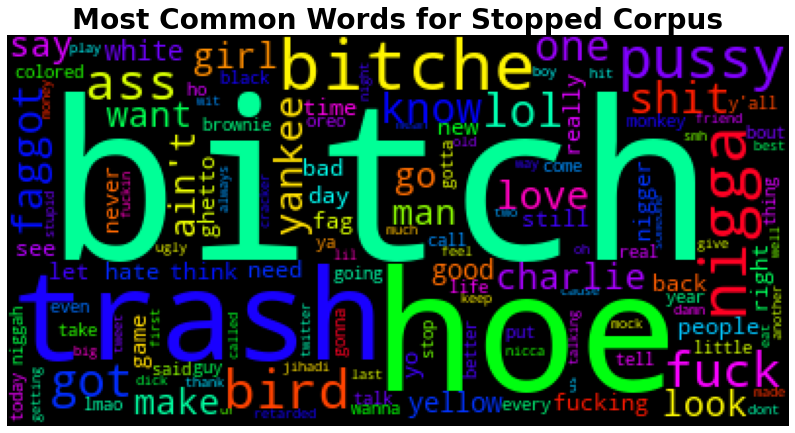

In [255]:
plot_wordcloud(stopped_tokens, 'Stopped Corpus');

In [256]:
hate_tokens = get_token_list(df.groupby('class').get_group('hate speech'), 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 3487


,token,count
0,bitch,209
1,faggot,190
2,like,167
3,nigga,139
4,ass,138
5,white,127
6,fuck,121
7,trash,113
8,nigger,112
9,fucking,94


In [257]:
offensive_tokens = get_token_list(df.groupby('class').get_group('offensive'), 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 6685


,token,count
0,bitch,1844
1,bitches,705
2,hoes,518
3,like,512
4,pussy,508
5,hoe,440
6,ass,317
7,fuck,292
8,shit,283
9,get,271


In [258]:
neither_tokens = get_token_list(df.groupby('class').get_group('neither'), 'tokens_stopped', freq=True)


********** tokens_stopped Summary **********

Number of unique words = 9652


,token,count
0,trash,689
1,bird,303
2,like,302
3,charlie,260
4,yankees,225
5,yellow,218
6,birds,169
7,lol,147
8,get,147
9,one,130


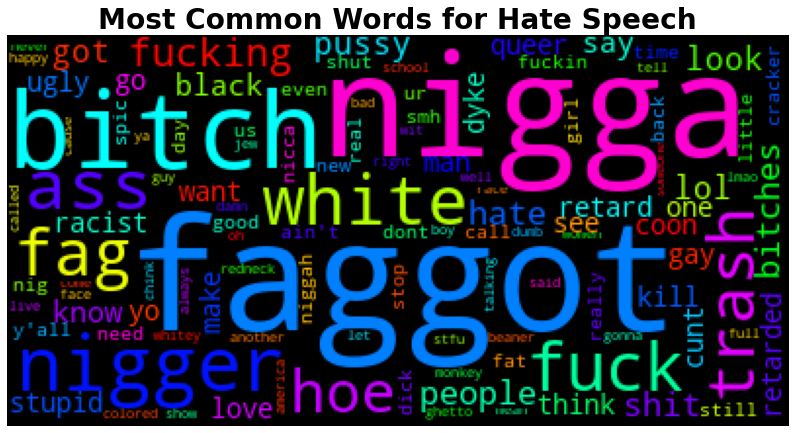

In [259]:
plot_wordcloud(hate_tokens, 'Hate Speech');

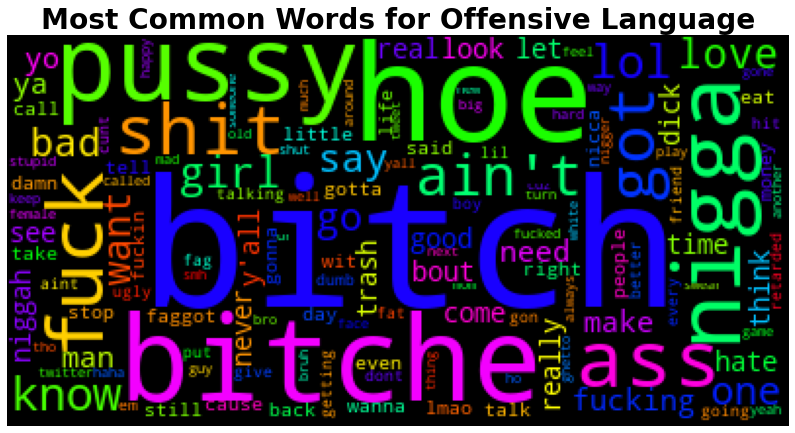

In [260]:
plot_wordcloud(offensive_tokens, 'Offensive Language');

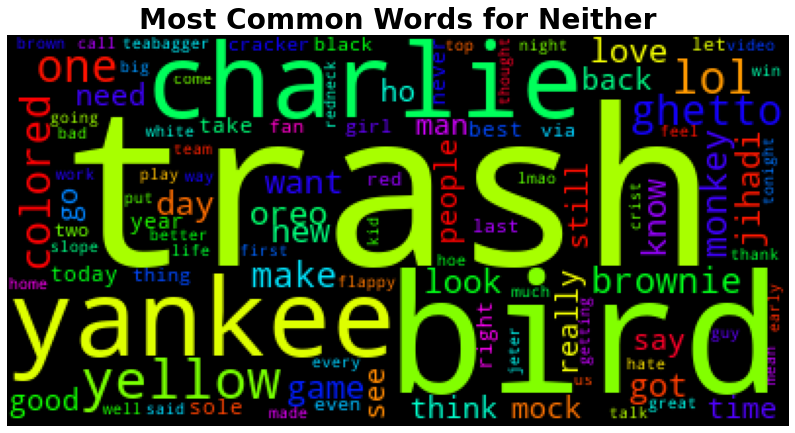

In [261]:
plot_wordcloud(neither_tokens, 'Neither');

In [262]:
## Create bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

## Make a DataFrame from the bigrams
pd.DataFrame(tweets_scored, columns=['Word', 'Freq']).head(25)

,Word,Freq
0,"(look, like)",0.001046
1,"(white, trash)",0.000980
2,"(bitch, ass)",0.000913
3,"(like, bitch)",0.000715
4,"(ass, nigga)",0.000702
5,"(ass, bitch)",0.000688
6,"(bad, bitch)",0.000649
7,"(fuck, bitch)",0.000635
8,"(flappy, bird)",0.000556
9,"(little, bitch)",0.000530


In [263]:
## Calculate Pointwise Mutual Information scores
tweet_pmi_finder = nltk.BigramCollocationFinder.from_words(stopped_tokens)
tweet_pmi_finder.apply_freq_filter(5)
tweet_pmi_scored = tweet_pmi_finder.score_ngrams(bigram_measures.pmi)

# Make a DataFrame from the Bigrams with PMI
pd.DataFrame.from_records(tweet_pmi_scored, columns=['Words', 'PMI']).head(25)

,Words,PMI
0,"(spear, chucker)",13.619972
1,"(disrupts, shylock)",13.397579
2,"(operation, disrupts)",13.397579
3,"(shylock, banking)",13.397579
4,"(scally, lad)",12.549582
5,"(blah, blah)",12.368433
6,"(rated, spa)",11.957007
7,"(grand, opening)",11.812617
8,"(guinea, pig)",11.812617
9,"(catches, worm)",11.771975


# MODEL

## Train Test Split

In [264]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

In [265]:
## Make X and y
y = df['class_code'].copy()
X = df['text'].copy()
X

0                                   " :     queer" gaywad
1       " :   alsarabsss" hes a beaner smh you can tel...
2       " :   you're fucking gay, blacklisted hoe" Hol...
3       " : LMFAOOOO I HATE BLACK PEOPLE   This is why...
4              " : "At least I'm not a nigger"  \n\nLmfao
                              ...                        
9995    yaya ho.. cute avi tho     I had no idea she w...
9996    yea so about   's new friend.. all my friends ...
9997    you know what they say, the early bird gets th...
9998    you've gone and broke the wrong heart baby, an...
9999    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: text, Length: 10000, dtype: object

In [266]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=319)
# setting stratify=y should ensure class imbalances remain similar to original distribution

In [267]:
## Check for class imbalance across all sets of y
print('**original**\n', y.value_counts(normalize=True), '\n------\n')
print('**y_train**\n', y_train.value_counts(normalize=True), '\n------\n')
print('**y_test**\n', y_test.value_counts(normalize=True), '\n------\n')

**original**
 1    0.4407
2    0.4163
0    0.1430
Name: class_code, dtype: float64 
------

**y_train**
 1    0.44075
2    0.41625
0    0.14300
Name: class_code, dtype: float64 
------

**y_test**
 1    0.4405
2    0.4165
0    0.1430
Name: class_code, dtype: float64 
------



In [268]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000,) (2000,) (8000,) (2000,)


## Baseline Models

In [269]:
## Initialize tokenizer to use for base model
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

## Initialize vectorizers to use for base models
count_vec = CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)

tfidf_vec = TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)

## Vectorize X_train and X_test with each vectorizer
X_train_count_vec = count_vec.fit_transform(X_train)
X_test_count_vec = count_vec.transform(X_test)

X_train_tfidf_vec = tfidf_vec.fit_transform(X_train)
X_test_tfidf_vec = tfidf_vec.transform(X_test)

print(X_train_count_vec.shape, X_test_count_vec.shape)
print(X_train_tfidf_vec.shape, X_test_tfidf_vec.shape)

(8000, 12432) (2000, 12432)
(8000, 12432) (2000, 12432)


In [270]:
## Build baseline Random Forest Pipelines - 1 with Count Vectorizer, 1 with Tfidf

## Initialize tokenizer
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

# Build Pipelines for fitting model
rf_cv_pipe = Pipeline(steps=[
                         ('count_vec', CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('rf', RandomForestClassifier(random_state=319))
                        ])

rf_tfidf_pipe = Pipeline(steps=[
                         ('tfidf_vec', TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('rf', RandomForestClassifier(random_state=319))
                        ])

---------------------------------------------------------
Classification Report: Baseline RF with Count Vectorizer
---------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.69      0.53      0.60       286
   Offensive       0.85      0.90      0.88       881
     Neither       0.92      0.94      0.93       833

    accuracy                           0.86      2000
   macro avg       0.82      0.79      0.80      2000
weighted avg       0.86      0.86      0.86      2000

---------------------------------------------------------
---------------------------------------------------------




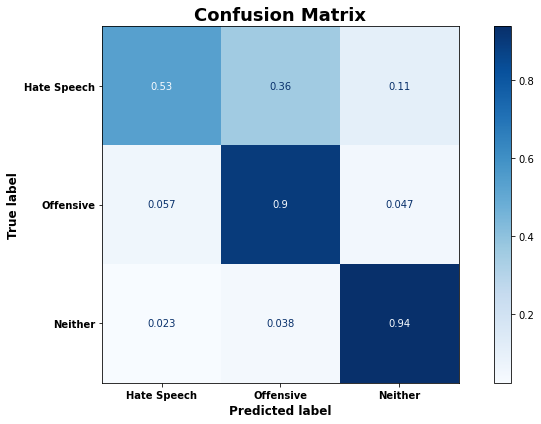

In [271]:
## Fit and evaluate baseline RF with Count Vectorizer
rf_cv_pipe.fit(X_train, y_train)
eval_classifier(rf_cv_pipe, X_test, y_test, model_descr='Baseline RF with Count Vectorizer');

In [272]:
print(len(rf_cv_pipe.named_steps['rf'].feature_importances_))
print(len(rf_cv_pipe.named_steps['count_vec'].vocabulary_))
rf_cv_pipe.named_steps['count_vec'].vocabulary_

12432
12432


{'damn': 2669,
 'shiner': 9622,
 'rock': 9098,
 'bud': 1476,
 'light': 6251,
 'platinum': 8148,
 'ciroc': 2025,
 'video': 11654,
 'charlie': 1846,
 'baker': 775,
 'makes': 6521,
 'final': 3886,
 'push': 8541,
 'votes': 11731,
 'bitch': 1098,
 'hey': 4948,
 'leave': 6123,
 'abbey': 47,
 'oh': 7564,
 'get': 4384,
 'job': 5710,
 'slope': 9895,
 'might': 6829,
 'move': 7056,
 'back': 737,
 'cause': 1752,
 'id': 5256,
 'lose': 6389,
 'lots': 6397,
 'money': 6981,
 'buying': 1577,
 'tickets': 10972,
 'gone': 4500,
 'bust': 1555,
 'open': 7635,
 'real': 8749,
 'nicca': 7308,
 'feed': 3814,
 'asked': 582,
 'buy': 1576,
 'burger': 1531,
 'work': 12163,
 'chic': 1908,
 'fil': 3872,
 'says': 9327,
 'b': 722,
 'save': 9311,
 'life': 6239,
 'typically': 11379,
 'hateful': 4836,
 'anti-christian': 434,
 'mentally': 6751,
 'ill': 5308,
 'ugly': 11408,
 'dyke': 3303,
 'trash': 11178,
 'pig': 8081,
 'couple': 2439,
 'jennifer': 5665,
 'mccarthy': 6672,
 'melisa': 6727,
 'erwin': 3535,
 'home': 5055,
 '

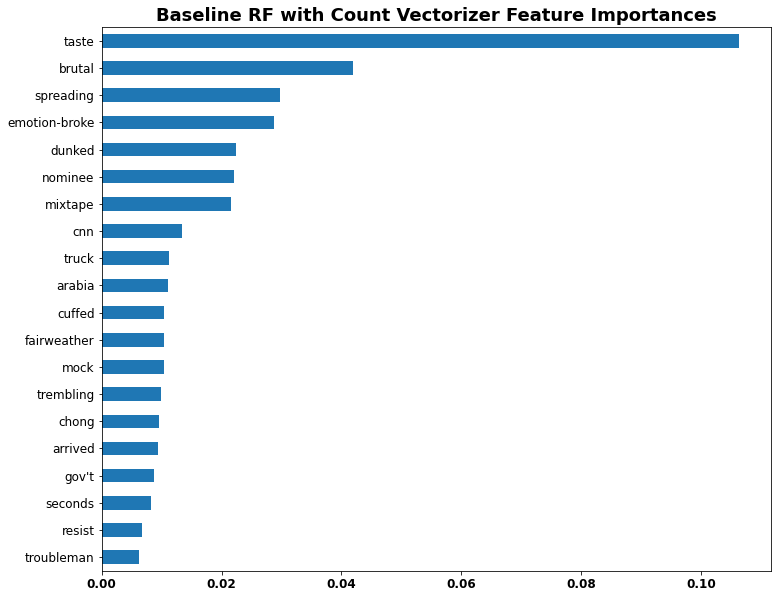

In [273]:
plot_feat_importance(rf_cv_pipe, 'rf', 'count_vec', 'Baseline RF with Count Vectorizer');

----------------------------------------------------------
Classification Report: Baseline RF with TF-IDF Vectorizer
----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.77      0.49      0.60       286
   Offensive       0.85      0.91      0.88       881
     Neither       0.91      0.95      0.93       833

    accuracy                           0.87      2000
   macro avg       0.84      0.78      0.80      2000
weighted avg       0.86      0.87      0.86      2000

----------------------------------------------------------
----------------------------------------------------------




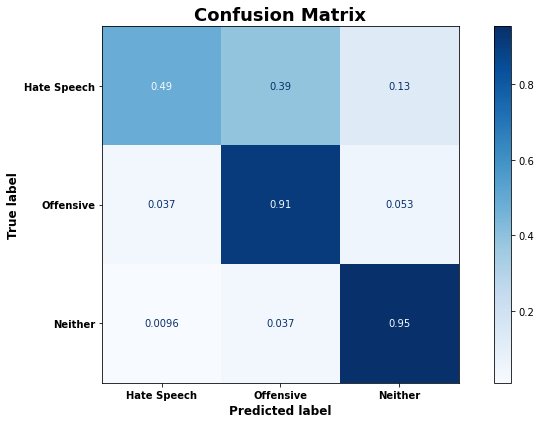

In [274]:
## Fit and evaluate baseline RF with TF-IDF Vectorizer
rf_tfidf_pipe.fit(X_train, y_train)
eval_classifier(rf_tfidf_pipe, X_test, y_test, model_descr='Baseline RF with TF-IDF Vectorizer');

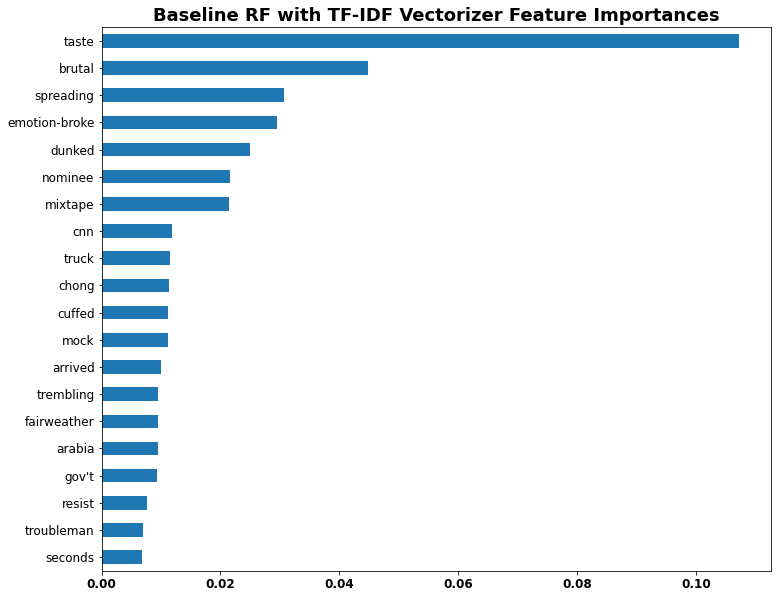

In [275]:
plot_feat_importance(rf_tfidf_pipe, 'rf', 'tfidf_vec', 'Baseline RF with TF-IDF Vectorizer');

In [276]:
## Build baseline XGBoost Pipelines - 1 with Count Vectorizer, 1 with Tfidf

## Initialize tokenizer
tweet_tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, reduce_len=True)

# Build Pipelines for fitting model
xgb_cv_pipe = Pipeline(steps=[
                         ('count_vec', CountVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('svd', TruncatedSVD(n_components=200, random_state=319)),
                         ('xgb', XGBClassifier(random_state=319, n_jobs=-1))
                        ])

xgb_tfidf_pipe = Pipeline(steps=[
                         ('tfidf_vec', TfidfVectorizer(tokenizer=tweet_tokenizer.tokenize,
                            stop_words=stopwords_list)),
                         ('svd', TruncatedSVD(n_components=200, random_state=319)),
                         ('xgb', XGBClassifier(random_state=319, n_jobs=-1))
                        ])

----------------------------------------------------------
Classification Report: Baseline XGB with Count Vectorizer
----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.72      0.38      0.50       286
   Offensive       0.87      0.86      0.87       881
     Neither       0.83      0.97      0.89       833

    accuracy                           0.84      2000
   macro avg       0.81      0.74      0.75      2000
weighted avg       0.83      0.84      0.83      2000

----------------------------------------------------------
----------------------------------------------------------




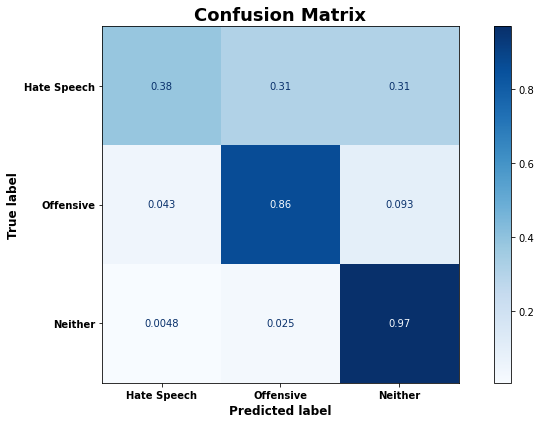

In [277]:
## Fit and evaluate baseline XGB with Count Vectorizer
xgb_cv_pipe.fit(X_train, y_train)
eval_classifier(xgb_cv_pipe, X_test, y_test, model_descr='Baseline XGB with Count Vectorizer');

In [278]:
#plot_feat_importance(xgb_cv_pipe, 'xgb', 'count_vec', 'Baseline XGB with Count Vectorizer');

-----------------------------------------------------------
Classification Report: Baseline XGB with TF-IDF Vectorizer
-----------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.73      0.44      0.55       286
   Offensive       0.87      0.88      0.87       881
     Neither       0.85      0.96      0.90       833

    accuracy                           0.85      2000
   macro avg       0.82      0.76      0.77      2000
weighted avg       0.84      0.85      0.84      2000

-----------------------------------------------------------
-----------------------------------------------------------




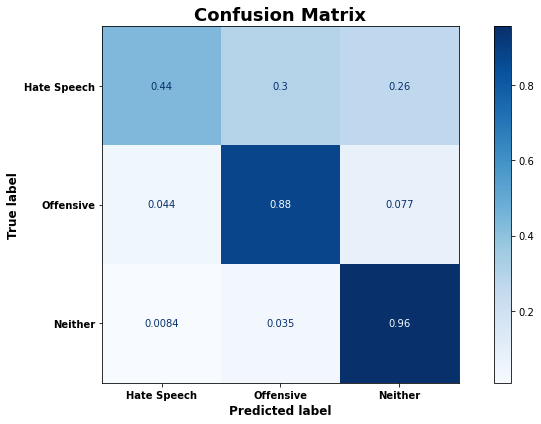

In [279]:
## Fit and evaluate baseline XGB with TF-IDF Vectorizer
xgb_tfidf_pipe.fit(X_train, y_train)
eval_classifier(xgb_tfidf_pipe, X_test, y_test, model_descr='Baseline XGB with TF-IDF Vectorizer');

## Hyperparameter Tuning for Random Forest Classifiers

### Tuning Count Vectorizer Random Forests

------------------------------------------------------------
***** Grid Search Started at 10/28/20 - 20:00:09 PM
------------------------------------------------------------


***** Training Completed at 10/28/20 - 20:05:14 PM

***** Total Training Time: 0:05:04.636581


Best Parameters:
{'count_vec__max_df': 1.0, 'count_vec__min_df': 1, 'count_vec__ngram_range': (1, 1), 'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__max_depth': None}


-------------------------------------------------------------------
Classification Report: Best Count Vectorizer RF Tuned for Accuracy
-------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.66      0.55      0.60       286
   Offensive       0.86      0.89      0.88       881
     Neither       0.92      0.94      0.93       833

    accuracy                           0.86      2000
   macro avg       0.81      0.79      0.80      2000
weighted avg   

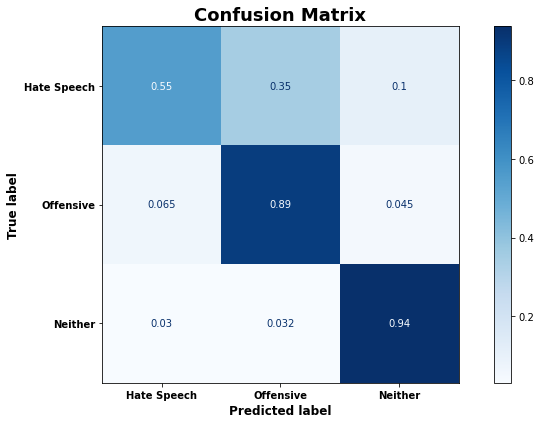

In [281]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[1, 0.005, 0.01],
          'count_vec__max_df':[1.0, 0.25, 0.5, 0.75],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_cv_acc_grid = fit_grid_clf(rf_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer RF Tuned for Accuracy',
                       score='accuracy')

In [282]:
best_acc_rf = rf_cv_acc_grid.best_estimator_.named_steps['rf']
len(best_acc_rf.feature_importances_)
rf_cv_acc_grid.best_estimator_.named_steps['count_vec'].vocabulary_

{'damn': 2669,
 'shiner': 9622,
 'rock': 9098,
 'bud': 1476,
 'light': 6251,
 'platinum': 8148,
 'ciroc': 2025,
 'video': 11654,
 'charlie': 1846,
 'baker': 775,
 'makes': 6521,
 'final': 3886,
 'push': 8541,
 'votes': 11731,
 'bitch': 1098,
 'hey': 4948,
 'leave': 6123,
 'abbey': 47,
 'oh': 7564,
 'get': 4384,
 'job': 5710,
 'slope': 9895,
 'might': 6829,
 'move': 7056,
 'back': 737,
 'cause': 1752,
 'id': 5256,
 'lose': 6389,
 'lots': 6397,
 'money': 6981,
 'buying': 1577,
 'tickets': 10972,
 'gone': 4500,
 'bust': 1555,
 'open': 7635,
 'real': 8749,
 'nicca': 7308,
 'feed': 3814,
 'asked': 582,
 'buy': 1576,
 'burger': 1531,
 'work': 12163,
 'chic': 1908,
 'fil': 3872,
 'says': 9327,
 'b': 722,
 'save': 9311,
 'life': 6239,
 'typically': 11379,
 'hateful': 4836,
 'anti-christian': 434,
 'mentally': 6751,
 'ill': 5308,
 'ugly': 11408,
 'dyke': 3303,
 'trash': 11178,
 'pig': 8081,
 'couple': 2439,
 'jennifer': 5665,
 'mccarthy': 6672,
 'melisa': 6727,
 'erwin': 3535,
 'home': 5055,
 '

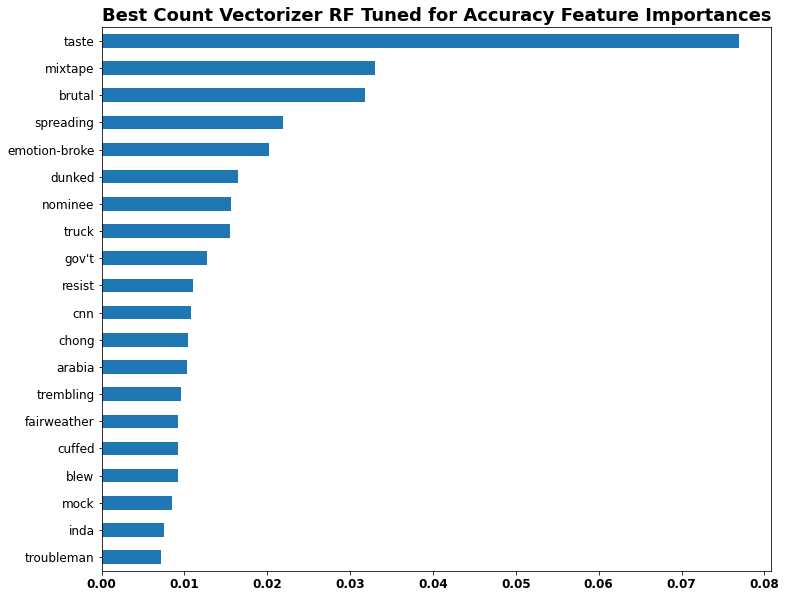

In [283]:
plot_feat_importance(rf_cv_acc_grid.best_estimator_, 'rf', 'count_vec',
                     'Best Count Vectorizer RF Tuned for Accuracy');

------------------------------------------------------------
***** Grid Search Started at 10/28/20 - 20:05:15 PM
------------------------------------------------------------


***** Training Completed at 10/28/20 - 20:10:03 PM

***** Total Training Time: 0:04:48.044331


Best Parameters:
{'count_vec__max_df': 1.0, 'count_vec__min_df': 1, 'count_vec__ngram_range': (1, 1), 'rf__class_weight': 'balanced', 'rf__criterion': 'gini', 'rf__max_depth': None}


----------------------------------------------------------------------------
Classification Report: Best Count Vectorizer RF Tuned for Balanced Accuracy
----------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.66      0.55      0.60       286
   Offensive       0.86      0.89      0.88       881
     Neither       0.92      0.94      0.93       833

    accuracy                           0.86      2000
   macro avg       0.81      0.79      0.8

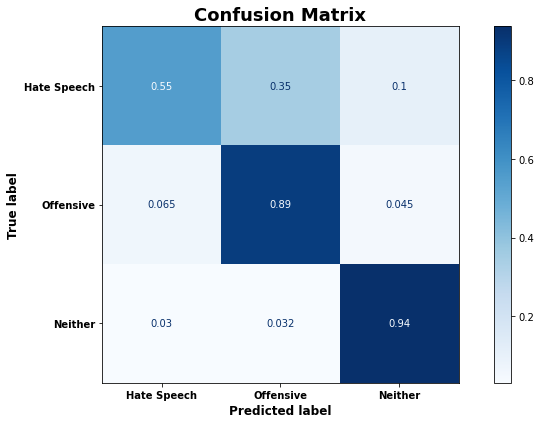

In [284]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[1, 0.005, 0.01],
          'count_vec__max_df':[1.0, 0.25, 0.5, 0.75],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_cv_bacc_grid = fit_grid_clf(rf_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer RF Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

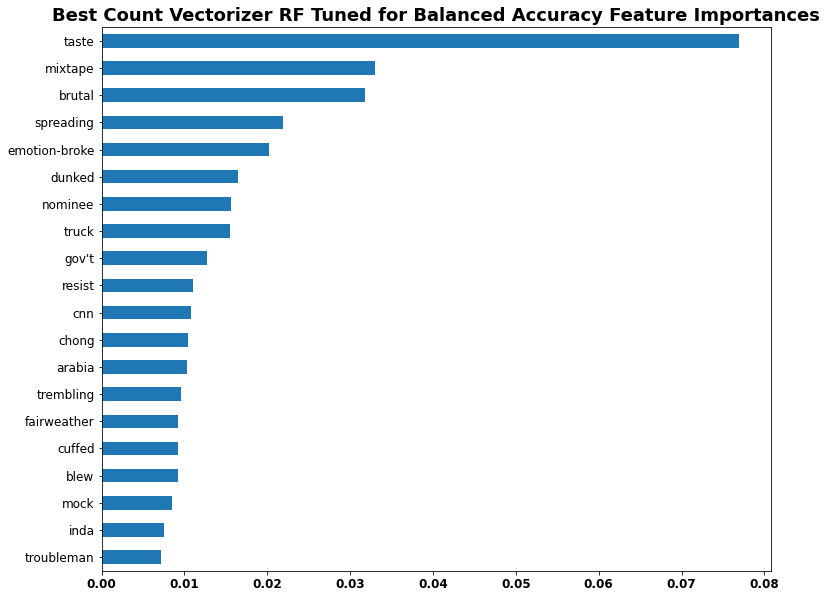

In [285]:
plot_feat_importance(rf_cv_bacc_grid.best_estimator_, 'rf', 'count_vec',
                     'Best Count Vectorizer RF Tuned for Balanced Accuracy');

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 11:18:01 AM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 11:22:46 AM

***** Total Training Time: 0:04:45.555463


Best Parameters:
{'count_vec__max_df': 1.0, 'count_vec__min_df': 0.005, 'count_vec__ngram_range': (1, 1), 'rf__class_weight': None, 'rf__criterion': 'gini', 'rf__max_depth': 6}


--------------------------------------------------------------------------
Classification Report: Best Count Vectorizer RF Tuned for Precision Macro
--------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       1.00      0.01      0.01       286
   Offensive       0.87      0.85      0.86       881
     Neither       0.72      0.99      0.83       833

    accuracy                           0.79      2000
   macro avg       0.86      0.61      0.57      2000

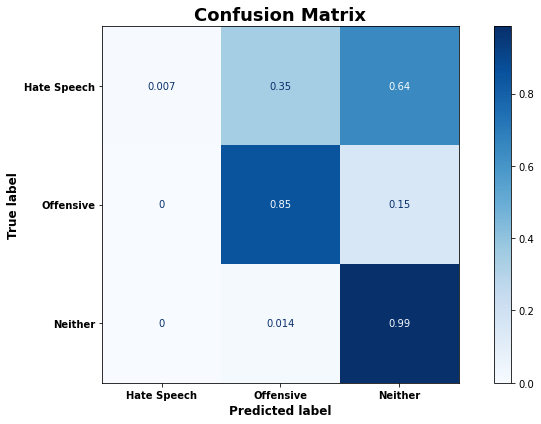

In [295]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[1, 0.005, 0.01],
          'count_vec__max_df':[1.0, 0.25, 0.5, 0.75],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_cv_precm_grid = fit_grid_clf(rf_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer RF Tuned for Precision Macro',
                       score='precision_macro')

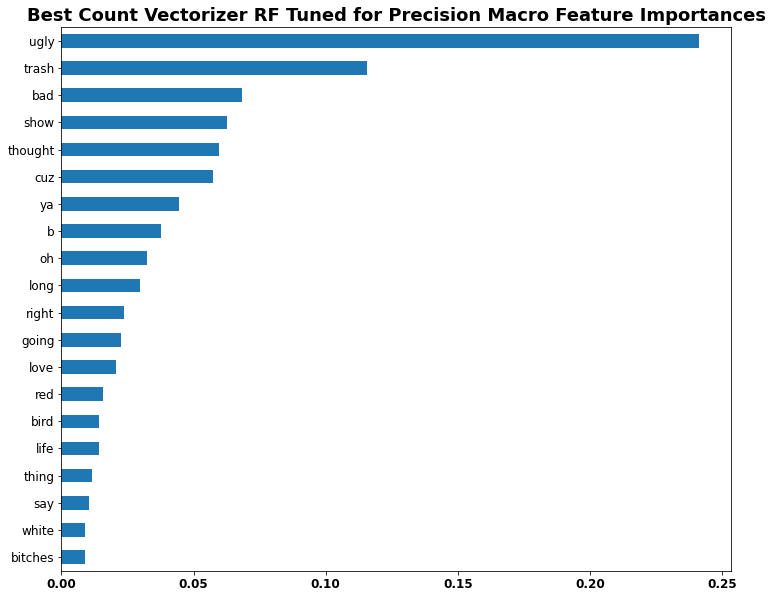

In [296]:
plot_feat_importance(rf_cv_precm_grid.best_estimator_, 'rf', 'count_vec',
                     'Best Count Vectorizer RF Tuned for Precision Macro');

### Tuning TF-IDF Vectorizer Random Forests

------------------------------------------------------------
***** Grid Search Started at 10/28/20 - 20:10:04 PM
------------------------------------------------------------


***** Training Completed at 10/28/20 - 20:14:42 PM

***** Total Training Time: 0:04:38.164158


Best Parameters:
{'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__max_depth': None, 'tfidf_vec__max_df': 1.0, 'tfidf_vec__min_df': 1, 'tfidf_vec__ngram_range': (1, 1)}


---------------------------------------------------------
Classification Report: Best TF-IDF RF Tuned for Accuracy
---------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.75      0.50      0.60       286
   Offensive       0.86      0.90      0.88       881
     Neither       0.90      0.96      0.93       833

    accuracy                           0.87      2000
   macro avg       0.84      0.78      0.80      2000
weighted avg       0.86      0.87      0.8

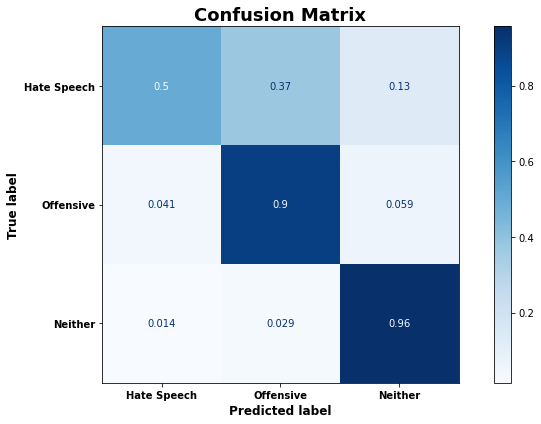

In [286]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[1, 0.005, 0.01],
          'tfidf_vec__max_df':[1.0, 0.25, 0.5, 0.75],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_tfidf_acc_grid = fit_grid_clf(rf_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF RF Tuned for Accuracy',
                       score='accuracy')

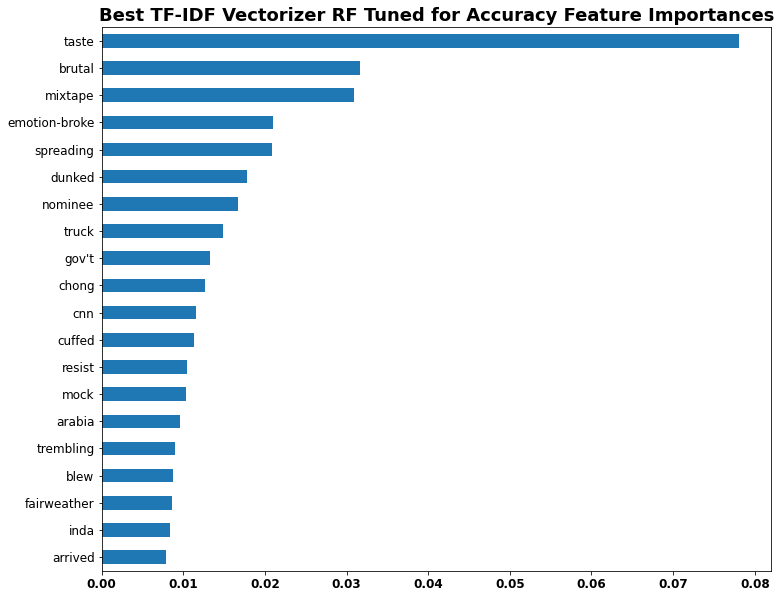

In [287]:
plot_feat_importance(rf_tfidf_acc_grid.best_estimator_, 'rf', 'tfidf_vec',
                     'Best TF-IDF Vectorizer RF Tuned for Accuracy');

------------------------------------------------------------
***** Grid Search Started at 10/28/20 - 20:14:43 PM
------------------------------------------------------------


***** Training Completed at 10/28/20 - 20:19:24 PM

***** Total Training Time: 0:04:40.822594


Best Parameters:
{'rf__class_weight': 'balanced', 'rf__criterion': 'entropy', 'rf__max_depth': None, 'tfidf_vec__max_df': 1.0, 'tfidf_vec__min_df': 1, 'tfidf_vec__ngram_range': (1, 1)}


------------------------------------------------------------------
Classification Report: Best TF-IDF RF Tuned for Balanced Accuracy
------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.75      0.50      0.60       286
   Offensive       0.86      0.90      0.88       881
     Neither       0.90      0.96      0.93       833

    accuracy                           0.87      2000
   macro avg       0.84      0.78      0.80      2000
weighted avg   

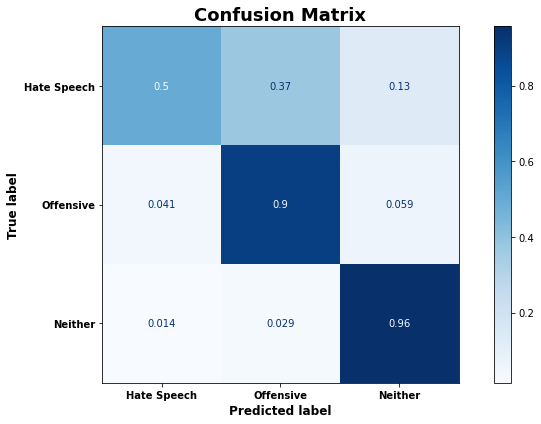

In [288]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[1, 0.005, 0.01],
          'tfidf_vec__max_df':[1.0, 0.25, 0.5, 0.75],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_tfidf_bacc_grid = fit_grid_clf(rf_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF RF Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

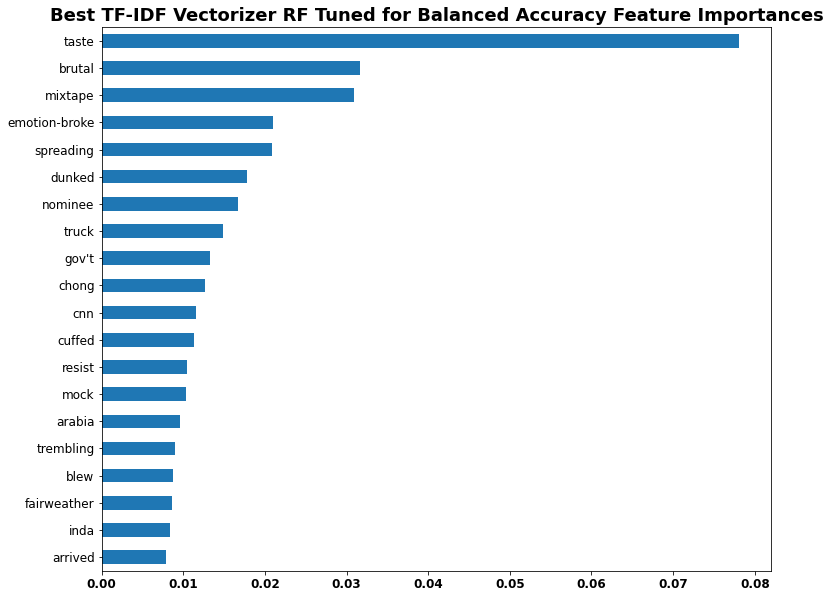

In [289]:
plot_feat_importance(rf_tfidf_bacc_grid.best_estimator_, 'rf', 'tfidf_vec',
                     'Best TF-IDF Vectorizer RF Tuned for Balanced Accuracy');

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 11:22:47 AM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 11:27:25 AM

***** Total Training Time: 0:04:38.517947


Best Parameters:
{'rf__class_weight': None, 'rf__criterion': 'gini', 'rf__max_depth': 6, 'tfidf_vec__max_df': 1.0, 'tfidf_vec__min_df': 0.005, 'tfidf_vec__ngram_range': (1, 2)}


----------------------------------------------------------------
Classification Report: Best TF-IDF RF Tuned for Precision Macro
----------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       1.00      0.02      0.03       286
   Offensive       0.87      0.85      0.86       881
     Neither       0.73      0.98      0.84       833

    accuracy                           0.79      2000
   macro avg       0.86      0.62      0.58      2000
weighted avg       0.83      

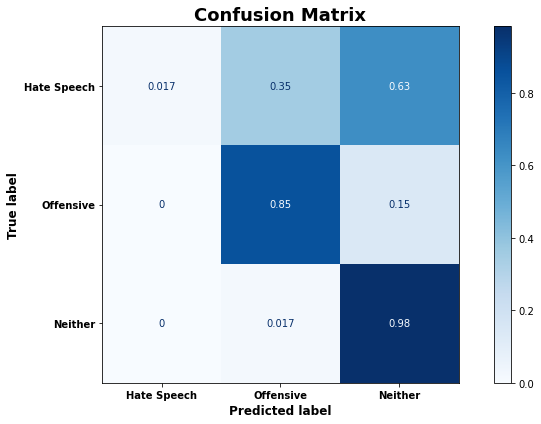

In [297]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[1, 0.005, 0.01],
          'tfidf_vec__max_df':[1.0, 0.25, 0.5, 0.75],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
rf_tfidf_precm_grid = fit_grid_clf(rf_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF RF Tuned for Precision Macro',
                       score='precision_macro')

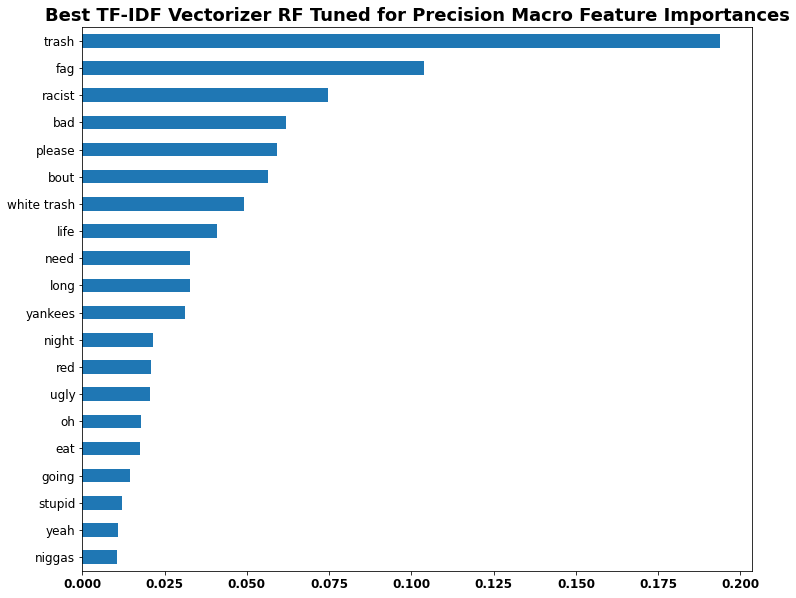

In [298]:
plot_feat_importance(rf_tfidf_precm_grid.best_estimator_, 'rf', 'tfidf_vec',
                     'Best TF-IDF Vectorizer RF Tuned for Precision Macro');

Models tuned for accuracy and weighted recall were identical and models tuned for balanced accuracy and macro recall were identical. This was true for both Count Vectorizer models and TF-IDF models. Further models will only be tuned to optimize accuracy and balanced accuracy. 

Models optimized for accuracy were able to correctly classify offensive language (91% recall for both vectorizers) and neither (95% recall for both vectorizers) the majority of the time. However, classification of hat speech, while better than random (random being 33% since there are 3 classes), was not very good (48% recall for Count Vectorizer and 46% recall for TF-IDF Vectorizer).

Models optimized for balanced accuracy were better at classifying hate speech (53% recall for Count Vectorizer and 57% recall for TF-IDF Vectorizer). However, this did come at the cost of decreased recall for the offensive class (dropped from 91% to 83% for both vectorizers). Correct classification of the 'Neither' category was not as negatively affected with recall for this class dropping from 95% to 94% for the Count Vectorizer and from 95% to 90% for the TF-IDF vectorizer.

## Hyperparameter Tuning for XGB Classifiers

### Tuning Count Vectorizer XGB Models

In [290]:
xgb_cv_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'count_vec', 'svd', 'xgb', 'count_vec__analyzer', 'count_vec__binary', 'count_vec__decode_error', 'count_vec__dtype', 'count_vec__encoding', 'count_vec__input', 'count_vec__lowercase', 'count_vec__max_df', 'count_vec__max_features', 'count_vec__min_df', 'count_vec__ngram_range', 'count_vec__preprocessor', 'count_vec__stop_words', 'count_vec__strip_accents', 'count_vec__token_pattern', 'count_vec__tokenizer', 'count_vec__vocabulary', 'svd__algorithm', 'svd__n_components', 'svd__n_iter', 'svd__random_state', 'svd__tol', 'xgb__base_score', 'xgb__booster', 'xgb__colsample_bylevel', 'xgb__colsample_bynode', 'xgb__colsample_bytree', 'xgb__gamma', 'xgb__learning_rate', 'xgb__max_delta_step', 'xgb__max_depth', 'xgb__min_child_weight', 'xgb__missing', 'xgb__n_estimators', 'xgb__n_jobs', 'xgb__nthread', 'xgb__objective', 'xgb__random_state', 'xgb__reg_alpha', 'xgb__reg_lambda', 'xgb__scale_pos_weight', 'xgb__seed', 'xgb__silent', 'xgb__subsample', 'xgb__v

------------------------------------------------------------
***** Grid Search Started at 10/28/20 - 20:19:25 PM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 00:05:37 AM

***** Total Training Time: 3:46:11.921328


Best Parameters:
{'count_vec__max_df': 1.0, 'count_vec__min_df': 1, 'count_vec__ngram_range': (1, 2), 'svd__n_components': 200, 'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 6, 'xgb__subsample': 1}


--------------------------------------------------------------------
Classification Report: Best Count Vectorizer XGB Tuned for Accuracy
--------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.75      0.39      0.51       286
   Offensive       0.86      0.88      0.87       881
     Neither       0.84      0.96      0.90       833

    accuracy                           0.84      2000
   macro avg       0.

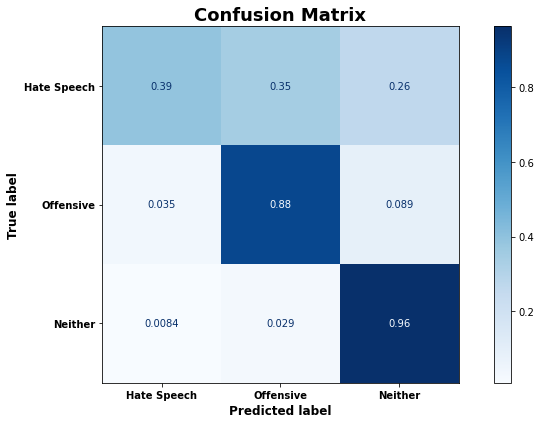

In [291]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[1, 0.005, 0.01],
          'count_vec__max_df':[1.0, 0.25, 0.5, 0.75],
          'svd__n_components':[150, 175, 200],
          'xgb__learning_rate':[0.1, 0.2],
          'xgb__max_depth':[None, 3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_cv_acc_grid = fit_grid_clf(xgb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer XGB Tuned for Accuracy',
                       score='accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 00:05:38 AM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 03:45:19 AM

***** Total Training Time: 3:39:41.894257


Best Parameters:
{'count_vec__max_df': 1.0, 'count_vec__min_df': 1, 'count_vec__ngram_range': (1, 1), 'svd__n_components': 150, 'xgb__colsample_bytree': 0.7, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__subsample': 0.7}


-----------------------------------------------------------------------------
Classification Report: Best Count Vectorizer XGB Tuned for Balanced Accuracy
-----------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.70      0.43      0.53       286
   Offensive       0.86      0.86      0.86       881
     Neither       0.84      0.96      0.89       833

    accuracy                           0.84   

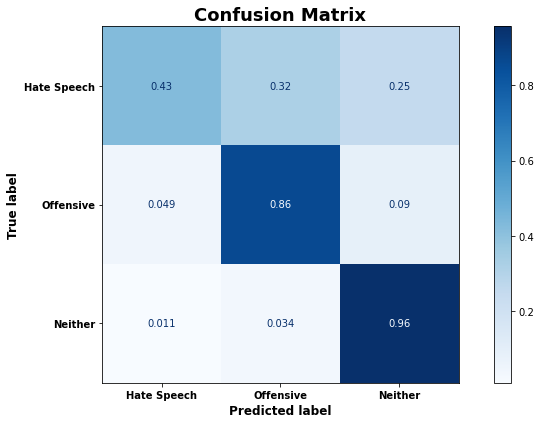

In [292]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[1, 0.005, 0.01],
          'count_vec__max_df':[1.0, 0.25, 0.5, 0.75],
          'svd__n_components':[150, 175, 200],
          'xgb__learning_rate':[0.1, 0.2],
          'xgb__max_depth':[None, 3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_cv_bacc_grid = fit_grid_clf(xgb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer XGB Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

In [299]:
## define a grid of different hyperparameter values to be tested
params = {'count_vec__ngram_range':[(1,1),(1,2)],
          'count_vec__min_df':[1, 0.005, 0.01],
          'count_vec__max_df':[1.0, 0.25, 0.5, 0.75],
          'rf__criterion':['gini', 'entropy'],
          'rf__max_depth':[None, 3, 6],
          'rf__class_weight':[None, 'balanced']
         }

## run the grid search to test parameters and find the best estimator 
xgb_cv_precm_grid = fit_grid_clf(xgb_cv_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best Count Vectorizer XGB Tuned for Precision Macro',
                       score='precision_macro')

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 11:27:26 AM
------------------------------------------------------------



ValueError: Invalid parameter rf for estimator Pipeline(steps=[('count_vec',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7f7f4ad35b38>>)),
                ('svd', TruncatedSVD(n_components=200, random_state=319)),
                ('xgb',
                 XGBClassifier(missing=nan, n_jobs=-1,
                               objective='multi:softprob', random_state=319))]). Check the list of available parameters with `estimator.get_params().keys()`.

### Tuning TF-IDF Vectorizer XGB Models

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 03:45:20 AM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 07:24:28 AM

***** Total Training Time: 3:39:08.147132


Best Parameters:
{'svd__n_components': 150, 'tfidf_vec__max_df': 1.0, 'tfidf_vec__min_df': 1, 'tfidf_vec__ngram_range': (1, 1), 'xgb__colsample_bytree': 1, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 6, 'xgb__subsample': 0.7}


---------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer XGB Tuned for Accuracy
---------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.71      0.47      0.56       286
   Offensive       0.86      0.89      0.87       881
     Neither       0.87      0.95      0.91       833

    accuracy                           0.85      2000
   macro avg      

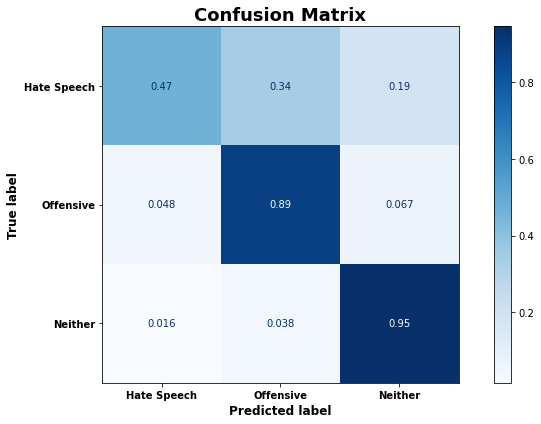

In [293]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[1, 0.005, 0.01],
          'tfidf_vec__max_df':[1.0, 0.25, 0.5, 0.75],
          'svd__n_components':[150, 175, 200],
          'xgb__learning_rate':[0.1, 0.2],
          'xgb__max_depth':[None, 3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_tfidf_acc_grid = fit_grid_clf(xgb_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer XGB Tuned for Accuracy',
                       score='accuracy')

------------------------------------------------------------
***** Grid Search Started at 10/29/20 - 07:24:29 AM
------------------------------------------------------------


***** Training Completed at 10/29/20 - 11:18:00 AM

***** Total Training Time: 3:53:31.064393


Best Parameters:
{'svd__n_components': 150, 'tfidf_vec__max_df': 1.0, 'tfidf_vec__min_df': 1, 'tfidf_vec__ngram_range': (1, 1), 'xgb__colsample_bytree': 1, 'xgb__learning_rate': 0.2, 'xgb__max_depth': 3, 'xgb__subsample': 0.7}


------------------------------------------------------------------------------
Classification Report: Best TF-IDF Vectorizer XGB Tuned for Balanced Accuracy
------------------------------------------------------------------------------
              precision    recall  f1-score   support

 Hate Speech       0.70      0.50      0.58       286
   Offensive       0.87      0.88      0.87       881
     Neither       0.88      0.95      0.91       833

    accuracy                           0.86  

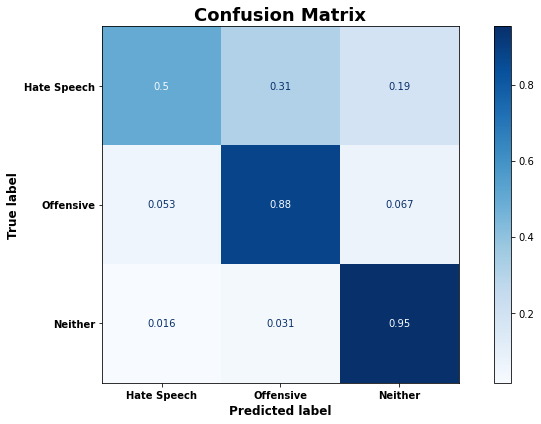

In [294]:
## define a grid of different hyperparameter values to be tested
params = {'tfidf_vec__ngram_range':[(1,1),(1,2)],
          'tfidf_vec__min_df':[1, 0.005, 0.01],
          'svd__n_components':[150, 175, 200],
          'xgb__learning_rate':[0.1, 0.2],
          'xgb__max_depth':[None, 3, 6],
          'xgb__subsample': [0.7, 1],
          'xgb__colsample_bytree':[0.7, 1]
         }

## run the grid search to test parameters and find the best estimator 
xgb_tfidf_bacc_grid = fit_grid_clf(xgb_tfidf_pipe, params, 
                       X_train, y_train,
                       X_test, y_test,
                       model_descr='Best TF-IDF Vectorizer XGB Tuned for Balanced Accuracy',
                       score='balanced_accuracy')

# INTERPRET

# Conclusions/Recommendations